<a href="https://colab.research.google.com/github/vineethvs23/TensorFlow/blob/main/Fashion_MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJLLX7P/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJLLX7P/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
class_names = metadata.features['label'].names

In [6]:
num_train_samples = metadata.splits['train'].num_examples
num_test_samples = metadata.splits['test'].num_examples

In [7]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()


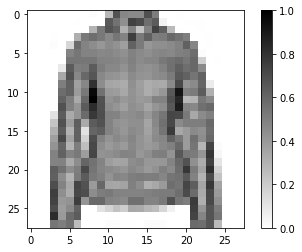

In [8]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap= plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

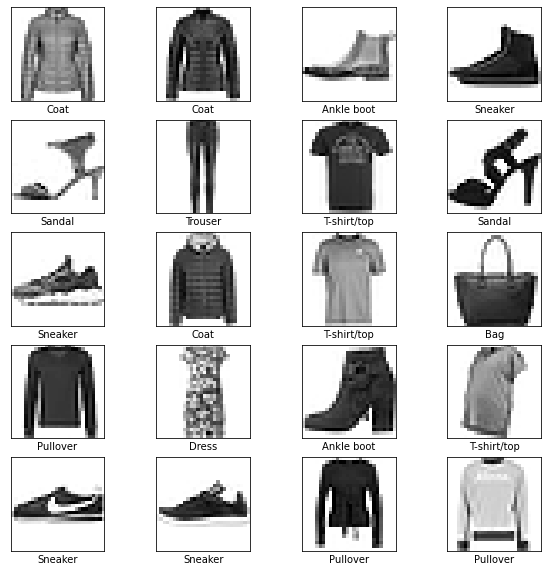

In [9]:
plt.figure(figsize=(10,10))
for i, (image,label) in enumerate(test_dataset.take(20)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3), padding = 'same', activation = tf.nn.relu,
                                                    input_shape=(28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Conv2D(64, (3,3), padding='same', activation = tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2,2), strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

In [11]:
model.compile(optimizer='adam',
              loss = tf.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_samples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [14]:
model.fit(train_dataset, epochs = 10, steps_per_epoch=math.ceil(num_train_samples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 41s 3ms/step - loss: 0.5535 - accuracy: 0.8019
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2690 - accuracy: 0.9010
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2218 - accuracy: 0.9188
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1858 - accuracy: 0.9323
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1635 - accuracy: 0.9398
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1322 - accuracy: 0.9517
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1138 - accuracy: 0.9582
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0997 - accuracy: 0.9619
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0775 - accuracy: 0.9723
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.06

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_samples/BATCH_SIZE))
print("accuracy on test dataset:", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3189 - accuracy: 0.9189
accuracy on test dataset: 0.9189000129699707


In [17]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [18]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

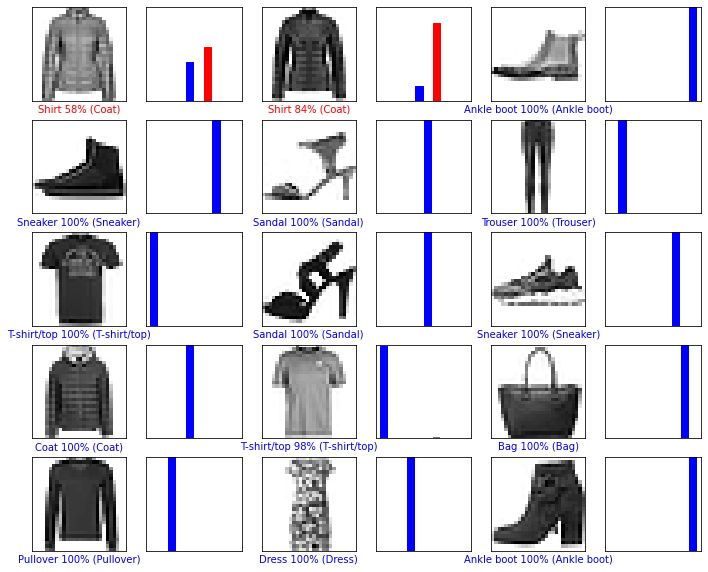

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)